<a href="https://colab.research.google.com/github/rainforest01-coder/ESAA_files/blob/main/ESAA_WEEK8_2%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#06규제 선형 모델- 릿지, 라쏘, 엘라스틱넷

##규제 선형 모델의 개요

회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야함

최적 모델을 위한 cost함수 구성요소  
= 학습데이터 잔차오류 최소화+ 회귀계수 크기 제어(균형)

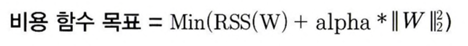

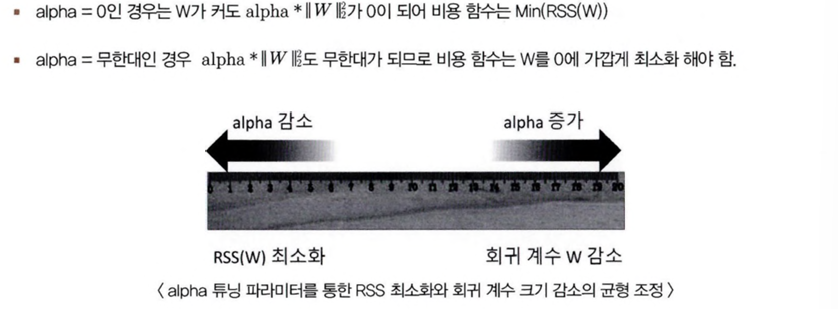

* alpha: 크게하면 비용함수는 회귀 계수 W의 값을 작게 해 과적합 개선/작게하면 회귀 계수 W값이 커져도 어느정도 상쇄 가능하므로 학습데이터 적합 개선 가능
> alpha값으로 페널티 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제

1. L2 규제: 위와 같이 W의 제곱에 대해 페널티 부여(릿지)
2. L1 규제: W의 절댓값에 대해 페널티 부여/영향력이 크지 않은 회귀 계수 값을 0으로 변환(라쏘 회귀)

## 릿지 회귀

In [ ]:
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"

raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])

target = raw_df.values[1::2, 2]

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
bostonDF=pd.DataFrame(data,columns=feature_names)
bostonDF['PRICE']=target

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1,inplace=False)
X_train,X_test,y_train,y_test=train_test_split(X_data,y_target,test_size=0.3,random_state=156)

In [3]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge=Ridge(alpha=10)
neg_mse_scores=cross_val_score(ridge,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores: ',np.round(neg_mse_scores,3))
print('5 folds의 개별 RMSE scores: ',np.round(rmse_scores,3))
print('5 folds의 평균 RMSE scores: ',np.round(avg_rmse,3))

5 folds의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores:  [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE scores:  5.518


rmse 평균값 반환 코드

In [4]:
alphas=[0,0.1,1,10,100]

for alpha in alphas:
  ridge=Ridge(alpha=alpha)

  neg_mse_scores=cross_val_score(ridge,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
  avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
  print('alpha {0} 일 때 5 folds의 평균 RMSE:{1:.3f}'.format(alpha,avg_rmse))

alpha 0 일 때 5 folds의 평균 RMSE:5.829
alpha 0.1 일 때 5 folds의 평균 RMSE:5.788
alpha 1 일 때 5 folds의 평균 RMSE:5.653
alpha 10 일 때 5 folds의 평균 RMSE:5.518
alpha 100 일 때 5 folds의 평균 RMSE:5.330


알파값 변화에 따른 피처의 회귀 계수 값 그래프 그리기

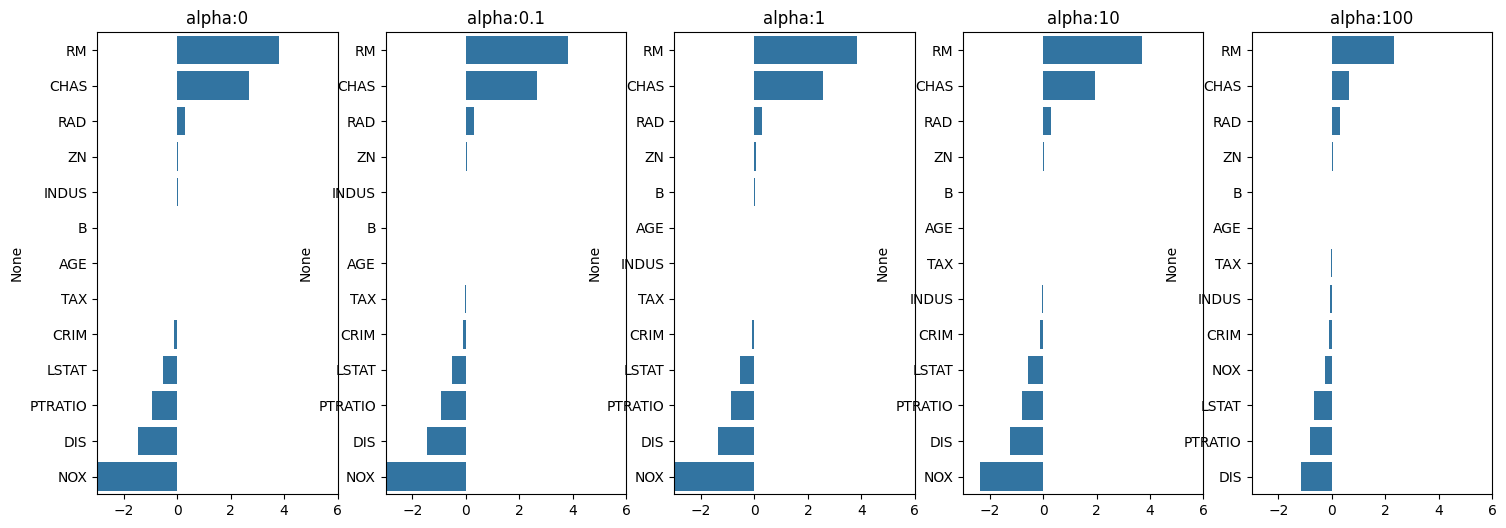

In [6]:
fig, axs=plt.subplots(figsize=(18,6),nrows=1,ncols=5)
coeff_df=pd.DataFrame()

for pos,alpha in enumerate(alphas):
  ridge=Ridge(alpha=alpha)
  ridge.fit(X_data,y_target)
  coeff=pd.Series(data=ridge.coef_,index=X_data.columns)
  colname='alpha:'+str(alpha)
  coeff_df[colname]=coeff

  coeff=coeff.sort_values(ascending=False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3,6)
  sns.barplot(x=coeff.values, y=coeff.index,ax=axs[pos])
plt.show()

alpha값 증가에 따라 회귀 계수 지속적 감소

In [9]:
ridge_alphas=[0,0.1,1,10,100]
sort_column='alpha:'+str(ridge_alphas[0])# 기준 칼럼

coeff_df.sort_values(by=sort_column,ascending=False)# 행 정렬


,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


##라쏘 회귀

불필요한 회귀계수 급격히 감소시켜 0으로 만들고 제거

알파값 변화시키며 결과 출력하는 함수생성

In [17]:
from sklearn.linear_model  import Lasso, ElasticNet

def get_linear_reg_eval(model_name,params=None,X_data_n=None,y_target_n=None,verbose=True,return_coeff=True):
  coeff_df=pd.DataFrame()
  if verbose: print('######',model_name,'######')
  for param in params:
    if model_name=='Ridge': model=Ridge(alpha=param)
    elif model_name=='Lasso': model=Lasso(alpha=param)
    elif model_name=='ElasticNet': model=ElasticNet(alpha=param,l1_ratio=0.7)
    neg_mse_scores=cross_val_score(model,X_data_n,y_target_n,scoring='neg_mean_squared_error',cv=5)
    avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha{0}일 때 5폴드 세트 평균 RMSE: {1:.3f}'.format(param,avg_rmse))
    model.fit(X_data_n,y_target_n)
    if return_coeff:
      coeff=pd.Series(data=model.coef_,index=X_data_n.columns)
      colname='alpha:'+str(param)
      coeff_df[colname]=coeff
  return coeff_df


In [18]:
lasso_alphas=[0.07,0.1,0.5,1,3]
coeff_lasso_df=get_linear_reg_eval('Lasso',params=lasso_alphas,X_data_n=X_data,y_target_n=y_target)

###### Lasso ######
alpha0.07일 때 5폴드 세트 평균 RMSE: 5.612
alpha0.1일 때 5폴드 세트 평균 RMSE: 5.615
alpha0.5일 때 5폴드 세트 평균 RMSE: 5.669
alpha1일 때 5폴드 세트 평균 RMSE: 5.776
alpha3일 때 5폴드 세트 평균 RMSE: 6.189


In [19]:
sort_column='alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column,ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


일부 회귀 계수 아예 0

##엘라스틱넷 회귀

L2+L1규제
* 라쏘회귀가 서로 상관관계가 높은 피처들의 경우 중요 피처만을 셀렉션하고 다른 피처들의 회귀 계수 0으로 만듦> 이를 완화하기 위해 L2규제 추가
* 수행시간이 오래 걸린다는 단점

엘라스틱 클래스의 alpha 파리미터 값=a+b

l1_ratio=a/(a+b)  
0일 경우 L2규제와 동일/1이면 L1규제와 동일

alpha값 변화 살펴보기

In [20]:
#l1_ratio=0.7고정
elastic_alphas=[0.07,0.1,0.5,1,3]
coeff_elastic_df=get_linear_reg_eval('ElasticNet',params=elastic_alphas,
                                     X_data_n=X_data,y_target_n=y_target)

###### ElasticNet ######
alpha0.07일 때 5폴드 세트 평균 RMSE: 5.542
alpha0.1일 때 5폴드 세트 평균 RMSE: 5.526
alpha0.5일 때 5폴드 세트 평균 RMSE: 5.467
alpha1일 때 5폴드 세트 평균 RMSE: 5.597
alpha3일 때 5폴드 세트 평균 RMSE: 6.068


In [21]:
sort_column='alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column,ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


각각의 알고리즘에서 최적의 하이퍼 파라미터 찾아내는 것 못지 않게 데이터 분포도의 정규화와 인코딩 방법 중요

##선형 회귀 모델을 위한 데이터 변환

선형회귀 모델은 피처와 타깃값 간에 선형 관계가 있다고 가정하고 최적의 선형 함수를 찾아내 결괏값 예측

피처값과 타깃값의 분포가 정규 분포 형태를 매우 선호
> 타깃의 분포가 심하게 외곡된 경우 변환작업 수행

1. StandardScaler(mean0/var1)/MinMaxScaler(min0/max1)
2. 스케일링/정규화를 수행한 데이터 세트에 다시 다항 특성 적용하여 변환(1번 해서 성능 향상 없는 경우)
3. 원래 값에 log함수 적용시 보다 정규분포에 가까운 형태로 값 분포(1,2,번보다 많이 사용)

타깃 값의 경우 일반적으로 로그 변환( 정규 변환시 다시 원본 타깃으로 원복 어려움)

1,3번 후 rmse로 예측 성능 측정

In [26]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures
def get_scaled_data(method='None',p_degree=None,input_data=None):
  if method=='Standard':
    scaled_data=StandardScaler().fit_transform(input_data)
  elif method=='MinMax':
    scaled_data=MinMaxScaler().fit_transform(input_data)
  elif method=='Log':
    scaled_data=np.log1p(input_data)
  else:
    scaled_data=input_data

  if p_degree!=None:
    scaled_data=PolynomialFeatures(degree=p_degree,include_bias=False).fit_transform(scaled_data)
  return scaled_data

In [27]:
alphas=[0.1,1,10,100]
scaled_methods=[(None,None),('Standard',None),('Standard',2),('MInMax',None),('MinMax',2),('Log',None)]
for scaled_method in scaled_methods:
  X_data_scaled=get_scaled_data(method=scaled_method[0],p_degree=scaled_method[1],input_data=X_data)
  print('\n##변환 유형: {0}, Polynomial Degree:{1}'.format(scaled_method[0],scaled_method[1]))
  get_linear_reg_eval('Ridge',params=alphas,X_data_n=X_data_scaled,y_target_n=y_target,verbose=False,return_coeff=False)


##변환 유형: None, Polynomial Degree:None
alpha0.1일 때 5폴드 세트 평균 RMSE: 5.788
alpha1일 때 5폴드 세트 평균 RMSE: 5.653
alpha10일 때 5폴드 세트 평균 RMSE: 5.518
alpha100일 때 5폴드 세트 평균 RMSE: 5.330

##변환 유형: Standard, Polynomial Degree:None
alpha0.1일 때 5폴드 세트 평균 RMSE: 5.826
alpha1일 때 5폴드 세트 평균 RMSE: 5.803
alpha10일 때 5폴드 세트 평균 RMSE: 5.637
alpha100일 때 5폴드 세트 평균 RMSE: 5.421

##변환 유형: Standard, Polynomial Degree:2
alpha0.1일 때 5폴드 세트 평균 RMSE: 8.827
alpha1일 때 5폴드 세트 평균 RMSE: 6.871
alpha10일 때 5폴드 세트 평균 RMSE: 5.485
alpha100일 때 5폴드 세트 평균 RMSE: 4.634

##변환 유형: MInMax, Polynomial Degree:None
alpha0.1일 때 5폴드 세트 평균 RMSE: 5.788
alpha1일 때 5폴드 세트 평균 RMSE: 5.653
alpha10일 때 5폴드 세트 평균 RMSE: 5.518
alpha100일 때 5폴드 세트 평균 RMSE: 5.330

##변환 유형: MinMax, Polynomial Degree:2
alpha0.1일 때 5폴드 세트 평균 RMSE: 5.298
alpha1일 때 5폴드 세트 평균 RMSE: 4.323
alpha10일 때 5폴드 세트 평균 RMSE: 5.185
alpha100일 때 5폴드 세트 평균 RMSE: 6.538

##변환 유형: Log, Polynomial Degree:None
alpha0.1일 때 5폴드 세트 평균 RMSE: 4.770
alpha1일 때 5폴드 세트 평균 RMSE: 4.676
alpha10일 때 5폴드 세트 평균 RMSE: 4.8

로그 변환 좋음

#07 로지스틱 회귀

선형 회귀 방식을 분류에 적용한 알고리즘  
분류 사용됨  
선형 회귀 계열이나 선형,비선형은 가중치 변수가 선형인지 아닌지에 따름

선형회귀와의 차이는 학습을 통해 선형 함수의 회귀 최적선을 찾는 것이 아니라 시그모이드 함수 최적선을 찾고 이 시그모이드 함수의 반환값을 확률로 간주해 확률에 따라 분류 결정

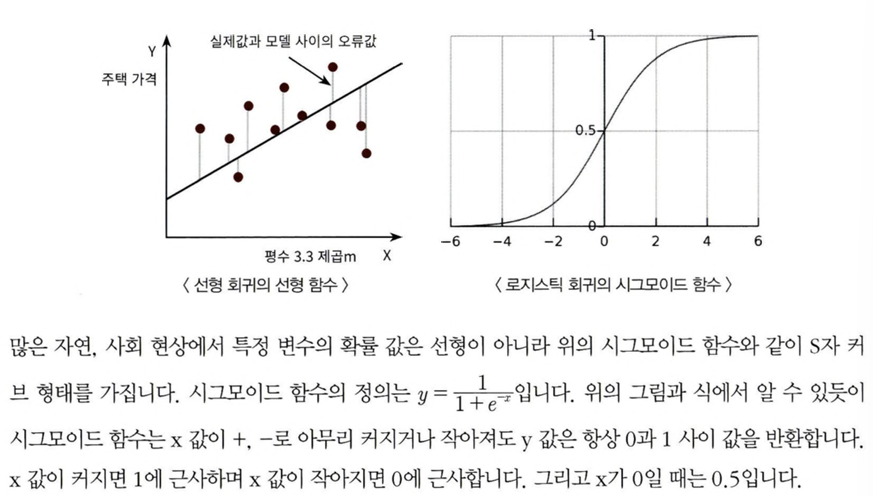

시그모이드 함수 이용시 좀 더 정확하게 0과 1에 대해 분류할 수 있음

회귀 계수 최적화 방법:

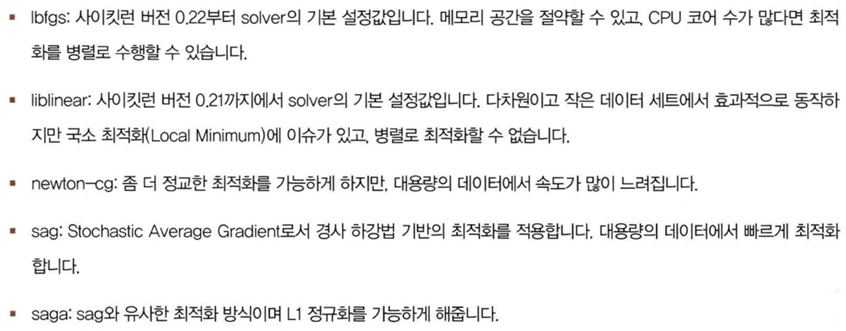

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer=load_breast_cancer()

선형 회귀 계열의 로지스틱 회귀는 데이터의 정규 분포도에 따라 예측 성능 영향  
정규분포 스케일링 적용

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler=StandardScaler()
data_scaled=scaler.fit_transform(cancer.data)
X_train,X_test,y_train,y_test=train_test_split(data_scaled,cancer.target,test_size=0.3,random_state=0)

In [33]:
from sklearn.metrics import accuracy_score,roc_auc_score

lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_preds=lr_clf.predict(X_test)
lr_preds_proba=lr_clf.predict_proba(X_test)[:,1]
print('accuracy:{0:.3f}, roc_auc: {1:.3f}'.format(accuracy_score(y_test,lr_preds),roc_auc_score(y_test,lr_preds_proba)))


accuracy:0.977, roc_auc: 0.995


서로 다른 solver값으로 수행
max_iter=600

In [36]:
solvers=['lbfgs','liblinear','newton-cg','sag','saga']
for solver in solvers:
  lr_clf=LogisticRegression(solver=solver,max_iter=600)
  lr_clf.fit(X_train,y_train)
  lr_preds=lr_clf.predict(X_test)
  lr_preds_proba=lr_clf.predict_proba(X_test)[:,1]
  print('solver:{0}, accuracy:{1:.3f}, roc_auc:{2:.3f}'.format(solver,
                                                               accuracy_score(y_test,lr_preds),
                                                               roc_auc_score(y_test,lr_preds_proba)))

solver:lbfgs, accuracy:0.977, roc_auc:0.995
solver:liblinear, accuracy:0.982, roc_auc:0.995
solver:newton-cg, accuracy:0.977, roc_auc:0.995
solver:sag, accuracy:0.982, roc_auc:0.995
solver:saga, accuracy:0.982, roc_auc:0.995


이외 주요 하이퍼 파라미터
* penalty: 규제 유형 설정(l1,l2)
* C: alpha값의 역수/작을수록 규제 강도 큼

Liblinear,saga의 경우 L1,L2 모두 가능
나머지 L2만 가능

그리드 서치로 최적화

In [38]:
from sklearn.model_selection import GridSearchCV
params={'solver': ['liblinear','lbfgs'],
        'penalty':['l2','l1'],
        'C':[0.01,0.1,1,5,10]}
lr_clf=LogisticRegression()
grid_clf=GridSearchCV(lr_clf,param_grid=params,scoring='accuracy',cv=3)
grid_clf.fit(data_scaled,cancer.target)
print('최적 하이퍼 파라미터:{0},최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'},최적 평균 정확도:0.979


#08 회귀 트리

결정트리와 같이 트리를 기반으로 하는 회귀 방식

분류 트리와 크게 다르지 않으나 리프 노드에서 예측 결정 값을 만드는 과정에 차이  
분류트리: 특정 클래스 레이블을 결정  
회귀 트리: 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값 계산

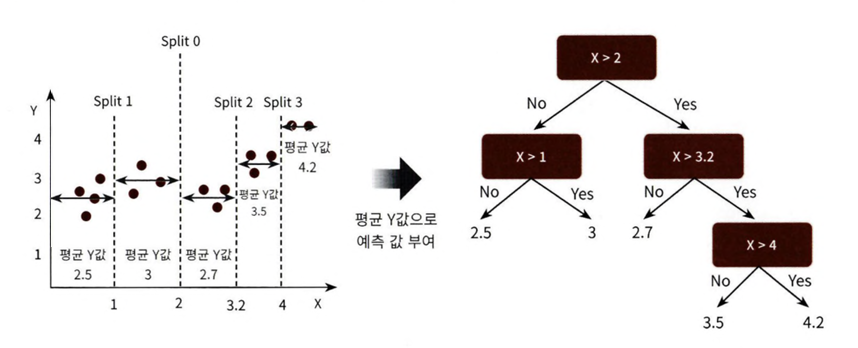

4장의 뷴류의 모든 트리 기반 알고리즘(결정트리 rf,gbm,xgboost,lightgbm)은 분류 뿐 아니라 회귀 가능

* CART(Classification & Regression Tree): 분류 뿐 아니라 회귀도 가능하게 해주는 알고리즘/트리 생성 기반

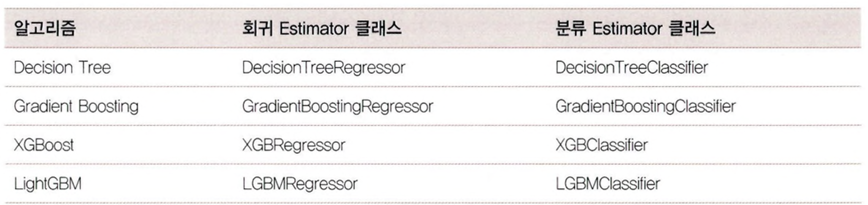

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
data_url = "http://lib.stat.cmu.edu/datasets/boston"

raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])

target = raw_df.values[1::2, 2]

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
bostonDF=pd.DataFrame(data,columns=feature_names)
bostonDF['PRICE']=target

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1,inplace=False)
X_train,X_test,y_train,y_test=train_test_split(X_data,y_target,test_size=0.3,random_state=156)

rf=RandomForestRegressor(random_state=0,n_estimators=1000)
neg_mse_scores=cross_val_score(rf,X_data,y_target,scoring="neg_mean_squared_error",cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print('5 교차 검증의 개별 Negative MSE socres: ',np.round(neg_mse_scores,2))
print('5 교차 검증의 개별 RMSE socres: ',np.round(rmse_scores,2))
print('5 교차 검증의 평균 RMSE: {0:.3f} '.format(avg_rmse))

5 교차 검증의 개별 Negative MSE socres:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증의 개별 RMSE socres:  [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평균 RMSE: 4.423 


In [41]:
def get_model_cv_prediction(model,X_data,y_target):
  neg_mse_scores=cross_val_score(model,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
  rmse_scores=np.sqrt(-1*neg_mse_scores)
  avg_rmse=np.mean(rmse_scores)
  print('####',model.__class__.__name__,'####')
  print('5교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg=DecisionTreeRegressor(random_state=0,max_depth=4)
rf_reg=RandomForestRegressor(random_state=0,n_estimators=1000)
gb_reg=GradientBoostingRegressor(random_state=0,n_estimators=1000)
xgb_reg=XGBRegressor(n_estimators=1000)
lgb_reg=LGBMRegressor(n_estimators=1000)

models=[dt_reg,rf_reg,gb_reg,xgb_reg,lgb_reg]
for model in models:
  get_model_cv_prediction(model, X_data,y_target)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

coef_속성 없음 대신 피처 중요도 알아보기

<Axes: xlabel='None', ylabel='None'>

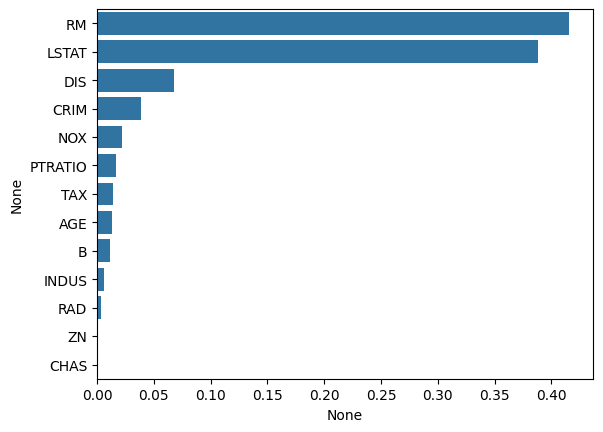

In [43]:
import seaborn as sns
%matplotlib inline
rf_reg=RandomForestRegressor(n_estimators=1000)

rf_reg.fit(X_data,y_target)

feature_series=pd.Series(data=rf_reg.feature_importances_,index=X_data.columns)
feature_series=feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series,y=feature_series.index)

회귀 트리 Regressor의 하이퍼파라미터는 분류트리와 거의 동일

회귀트리가 어떻게 예측값 판단하는지 선형 회귀와 비교 및 시각화

변수하나만 추출, 데이터 100개만 샘플링

(100, 2)


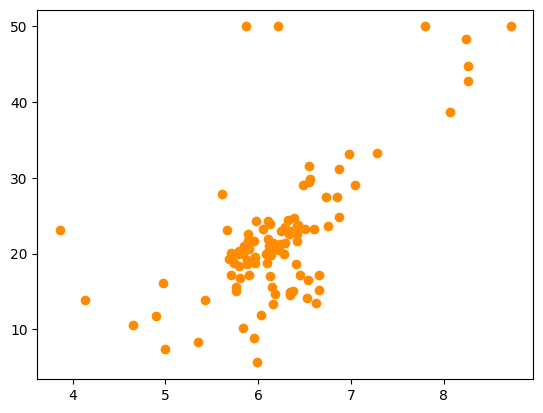

In [44]:
bostonDF_sample=bostonDF[['RM','PRICE']]
bostonDF_sample=bostonDF_sample.sample(n=100,random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(x=bostonDF_sample.RM,y=bostonDF_sample.PRICE,c='darkorange')

보스턴 데이터 세트에 대해 LinearRegression과 DecisionTreeRegressor를 max_depth를
각각 2, 7로 해서 학습

In [46]:
import numpy as np
from sklearn.linear_model import LinearRegression

lr_reg=LinearRegression()
rf_reg2=DecisionTreeRegressor(max_depth=2)
rf_reg7=DecisionTreeRegressor(max_depth=7)

X_test=np.arange(4.5,8.5,0.04).reshape(-1,1)

X_feature=bostonDF_sample['RM'].values.reshape(-1,1)
y_target=bostonDF_sample['PRICE'].values.reshape(-1,1)
lr_reg.fit(X_feature,y_target)
rf_reg2.fit(X_feature,y_target)
rf_reg7.fit(X_feature,y_target)

pred_lr=lr_reg.predict(X_test)
pred_rf2=rf_reg2.predict(X_test)
pred_rf7=rf_reg7.predict(X_test)

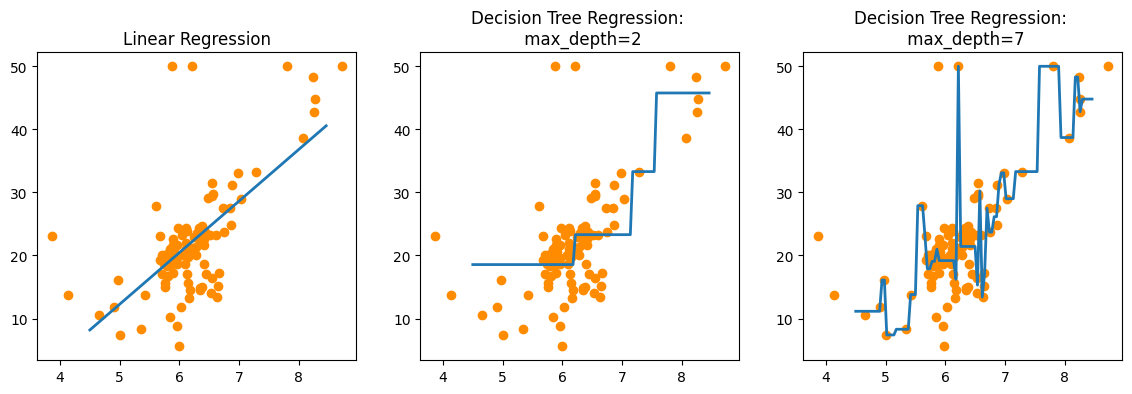

In [47]:
fig,(ax1,ax2,ax3)=plt.subplots(figsize=(14,4),ncols=3)
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM,bostonDF_sample.PRICE,c='darkorange')
ax1.plot(X_test,pred_lr,label='linear',linewidth=2)

ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM,bostonDF_sample.PRICE,c='darkorange')
ax2.plot(X_test,pred_rf2,label='max_depth:3',linewidth=2)

ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM,bostonDF_sample.PRICE,c='darkorange')
ax3.plot(X_test,pred_rf7,label='max_depth:7',linewidth=2)


선형 회귀는 직선으로 예측 회귀선을 표현하는데 반해 회귀 트리의 경우 분할되는 데이터 지점에 따라 브랜치를 만들면서 계단 형태로 회귀선 만듦

max_depth=7인 경우 과적합 되기 쉬운 모델